In [ ]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
nodes = json.load(open('node_list.json', 'rb'))
edges = json.load(open('edge_list.json', 'rb'))

In [ ]:
df= nx.DiGraph()

In [ ]:
[df.add_node(n['id'], nation=n['nation']) for n in nodes];

In [ ]:
[df.add_edge(edge['from'], edge['to'], type=edge['type']) for edge in edges];

In [ ]:
colour= {
    'Mondstadt': '#389695',
    'Liyue': '#d1a158',
    'Inazuma': '#816ab5',
    'Snezhnaya': '#7ad7f0'
}

In [ ]:
node_colors = []
for node, nation in list(df.nodes(data="nation")):
    if nation in colour:
        node_colors.append(colour[nation])
    else:
        node_colors.append('#979392') 

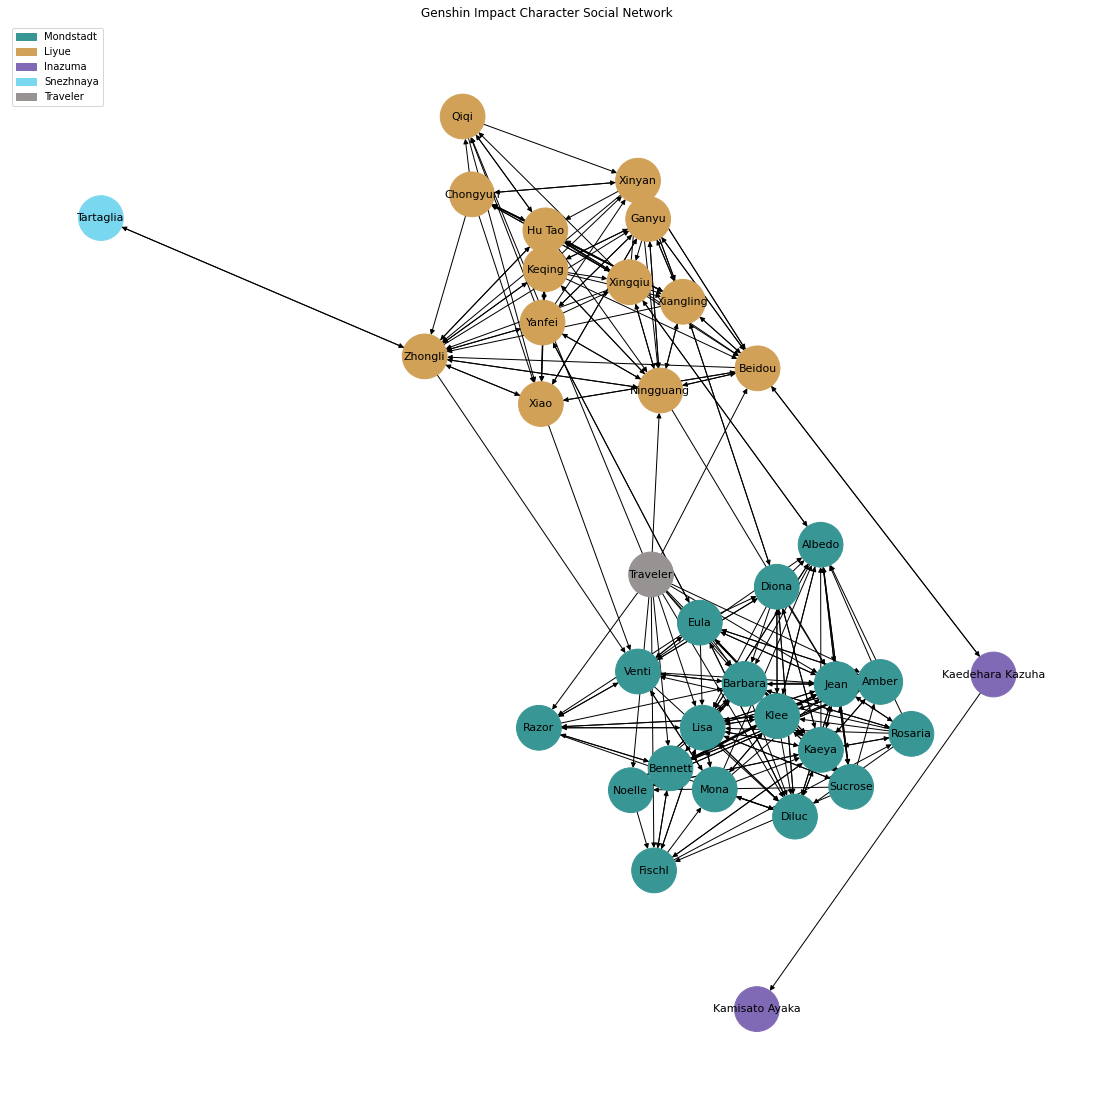

CPU times: user 1.72 s, sys: 228 ms, total: 1.94 s
Wall time: 1.71 s


In [ ]:
%%time
np.random.seed(2021)
pos = nx.spring_layout(df, k=0.3, iterations=25)

plt.figure(1,figsize=(15,15)) 
nx.draw(df,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')
legend_tiles = [mpatches.Patch(color="#389695", label="Mondstadt"),
                mpatches.Patch(color="#d1a158", label="Liyue"),
                mpatches.Patch(color="#816ab5", label="Inazuma"),
                mpatches.Patch(color="#7ad7f0", label="Snezhnaya"),
                mpatches.Patch(color="#979392", label="Traveler"),
               ]

plt.title("Genshin Impact Character Social Network")
plt.legend(handles=legend_tiles, loc="upper left")
plt.show()

In [ ]:
df.number_of_nodes()

35

In [ ]:
df.number_of_edges()

262

In [ ]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: df.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(10)

,id,nation,in_degree
34,Jean,Mondstadt,17
24,Lisa,Mondstadt,15
5,Kaeya,Mondstadt,13
6,Klee,Mondstadt,13
10,Diluc,Mondstadt,12
19,Barbara,Mondstadt,11
4,Zhongli,Liyue,11
16,Albedo,Mondstadt,11
15,Beidou,Liyue,10
12,Ningguang,Liyue,10


In [ ]:
dir_nodes_df['in_degree'].mean()

7.485714285714286

In [ ]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: df.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(10)

,id,nation,in_degree,out_degree
25,Traveler,NA,0,14
24,Lisa,Mondstadt,15,12
34,Jean,Mondstadt,17,11
5,Kaeya,Mondstadt,13,11
6,Klee,Mondstadt,13,11
14,Eula,Mondstadt,6,11
1,Keqing,Liyue,5,9
29,Diona,Mondstadt,6,9
8,Yanfei,Liyue,5,9
22,Hu Tao,Liyue,8,9


In [ ]:
dir_nodes_df['out_degree'].mean()

7.485714285714286

In [ ]:
undir = df.to_undirected(reciprocal=True)  

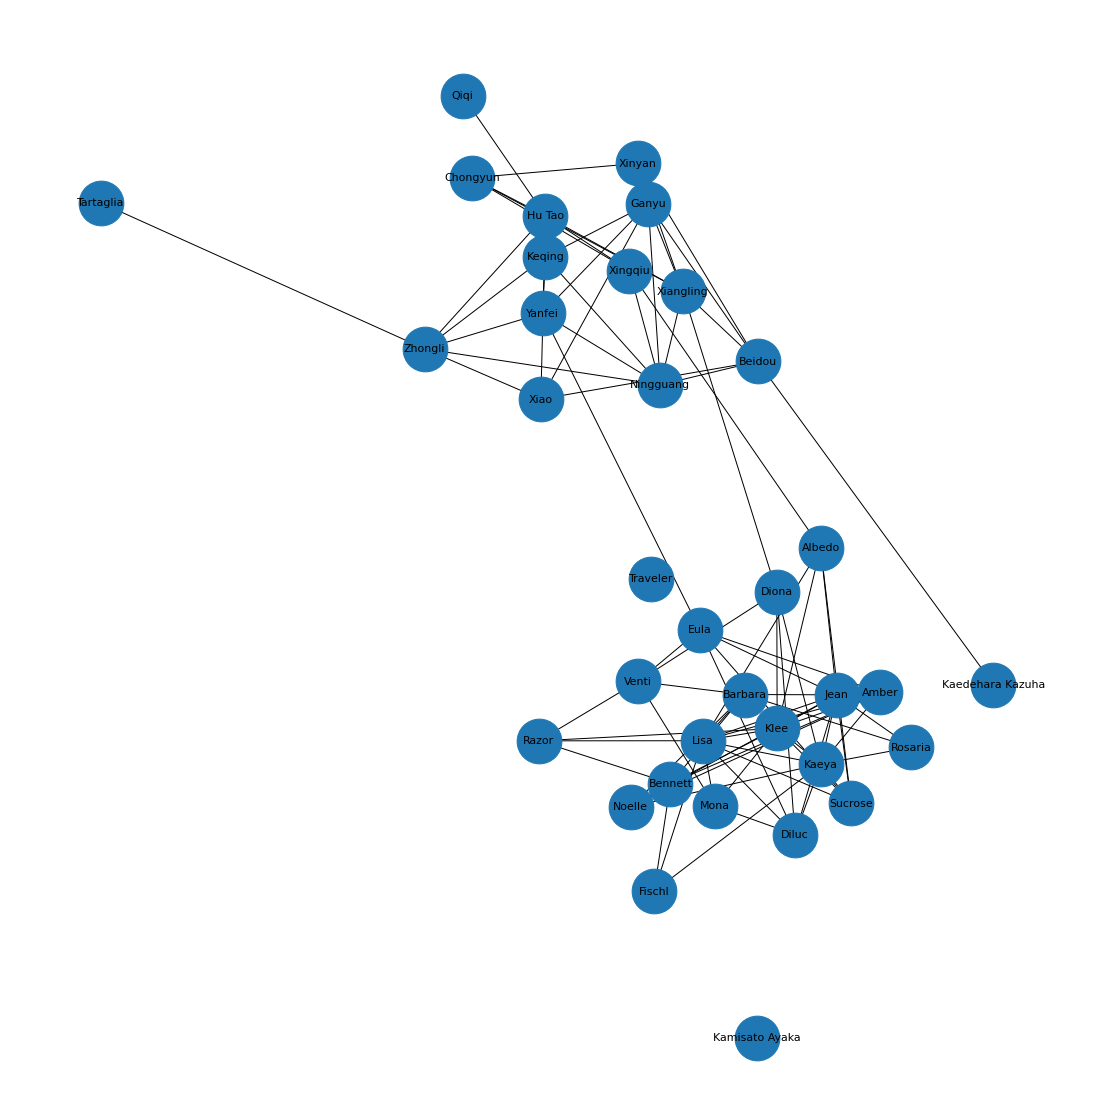

In [ ]:
plt.figure(1,figsize=(15,15)) 
nx.draw(undir, 
        nodelist=undir.nodes,
        pos = pos,
        node_size=2000,
        with_labels=True,
        font_size = 11,
        font_color='black')
plt.show()

In [ ]:
isolates = list(nx.isolates(undir))
undir.remove_nodes_from(isolates)

In [ ]:
undir.number_of_nodes()

33

In [ ]:
undir.number_of_edges()

89

In [ ]:
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolates)]

In [ ]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(undir.edges(n)))
undir_df.sort_values('degree', ascending=False).head(10)

,id,nation,degree
34,Jean,Mondstadt,11
24,Lisa,Mondstadt,11
5,Kaeya,Mondstadt,10
6,Klee,Mondstadt,10
12,Ningguang,Liyue,7
17,Amber,Mondstadt,7
3,Xiangling,Liyue,7
4,Zhongli,Liyue,6
15,Beidou,Liyue,6
2,Bennett,Mondstadt,6


In [ ]:
close_cen = nx.closeness_centrality(undir)
undir_df['closeness'] = undir_df['id'].apply(lambda n: close_cen[n])
undir_df.sort_values('closeness', ascending=False).head(10)

,id,nation,degree,closeness
29,Diona,Mondstadt,5,0.470588
3,Xiangling,Liyue,7,0.450704
34,Jean,Mondstadt,11,0.438356
16,Albedo,Mondstadt,5,0.438356
14,Eula,Mondstadt,6,0.438356
6,Klee,Mondstadt,10,0.432432
5,Kaeya,Mondstadt,10,0.426667
8,Yanfei,Liyue,5,0.421053
10,Diluc,Mondstadt,6,0.421053
13,Xingqiu,Liyue,4,0.421053


In [ ]:
bet_cen = nx.betweenness_centrality(undir)
undir_df['betweenness'] = undir_df['id'].apply(lambda n: bet_cen[n])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
3,Xiangling,Liyue,7,0.450704,0.220138
29,Diona,Mondstadt,5,0.470588,0.206497
14,Eula,Mondstadt,6,0.438356,0.164256
8,Yanfei,Liyue,5,0.421053,0.148855
16,Albedo,Mondstadt,5,0.438356,0.102882
13,Xingqiu,Liyue,4,0.421053,0.101402
22,Hu Tao,Liyue,6,0.385542,0.100667
5,Kaeya,Mondstadt,10,0.426667,0.087692
4,Zhongli,Liyue,6,0.363636,0.086822
6,Klee,Mondstadt,10,0.432432,0.083374


In [ ]:
eigen_cen = nx.eigenvector_centrality(undir)
undir_df['eigen'] = undir_df['id'].apply(lambda n: eigen_cen[n])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

,id,nation,degree,eigen
34,Jean,Mondstadt,11,0.380021
24,Lisa,Mondstadt,11,0.369083
5,Kaeya,Mondstadt,10,0.343876
6,Klee,Mondstadt,10,0.343121
17,Amber,Mondstadt,7,0.279945
21,Sucrose,Mondstadt,6,0.254812
10,Diluc,Mondstadt,6,0.220802
16,Albedo,Mondstadt,5,0.194347
31,Noelle,Mondstadt,5,0.193503
19,Barbara,Mondstadt,6,0.192033


In [ ]:
ranked_df = undir_df[['id', 'nation']].copy()
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
34,Jean,Mondstadt,1,3,11,1,4.00
5,Kaeya,Mondstadt,3,7,8,3,5.25
6,Klee,Mondstadt,4,6,10,4,6.00
24,Lisa,Mondstadt,2,12,14,2,7.50
3,Xiangling,Liyue,7,2,1,21,7.75
14,Eula,Mondstadt,15,4,3,11,8.25
16,Albedo,Mondstadt,17,5,5,8,8.75
29,Diona,Mondstadt,21,1,2,13,9.25
17,Amber,Mondstadt,6,15,17,5,10.75
21,Sucrose,Mondstadt,12,11,20,6,12.25


In [ ]:
ranked_df

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
0,Xinyan,Liyue,30,28,27,29,28.50
1,Keqing,Liyue,22,24,29,28,25.75
2,Bennett,Mondstadt,10,22,22,12,16.50
3,Xiangling,Liyue,7,2,1,21,7.75
4,Zhongli,Liyue,8,19,9,25,15.25
5,Kaeya,Mondstadt,3,7,8,3,5.25
6,Klee,Mondstadt,4,6,10,4,6.00
7,Mona,Mondstadt,24,26,25,14,22.25
8,Yanfei,Liyue,18,9,4,19,12.50
9,Chongyun,Liyue,25,21,23,27,24.00


In [ ]:
hub_scores, auth_scores = nx.hits(df)
hub_centrality_df = pd.DataFrame(hub_scores.items(), 
                           columns=["node", "hub_centrality"])
auth_centrality_df = pd.DataFrame(auth_scores.items(), 
                           columns=["node", "auth_centrality"])
hub_centrality_df.sort_values("hub_centrality", ascending=False).head(10)

,node,hub_centrality
25,Traveler,0.067400
24,Lisa,0.063647
34,Jean,0.058049
5,Kaeya,0.057443
6,Klee,0.056526
14,Eula,0.055123
29,Diona,0.052835
21,Sucrose,0.052102
20,Rosaria,0.051441
17,Amber,0.046236


In [ ]:
auth_centrality_df.sort_values("auth_centrality", ascending=False).head(10)

,node,auth_centrality
34,Jean,0.087187
24,Lisa,0.078032
5,Kaeya,0.071204
6,Klee,0.071027
10,Diluc,0.068840
16,Albedo,0.059420
19,Barbara,0.058982
17,Amber,0.058861
31,Noelle,0.047104
21,Sucrose,0.035925
